In [18]:
!nvidia-smi

Sun Sep 11 12:52:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    26W /  70W |  13962MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
! pip install min-dalle -q


     |████████████████████████████████| 197 kB 37.7 MB/s 


In [4]:
from PIL import Image
import numpy as np
from min_dalle import MinDalle
import torch

In [5]:

model = MinDalle(
    models_root='./pretrained',
    dtype=torch.float32, #bfloat16, float16, float32
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


In [6]:
prompt = 'an avocado landed on moon'

In [11]:
with open('prompt.txt', 'w') as f:
    f.write(prompt)

In [7]:
images = model.generate_image(
    text= prompt,
    seed=-1,
    grid_size=1,
    is_seamless=False,
    temperature=1,
    top_k=256,
    supercondition_factor=16,
    is_verbose=False
)

In [8]:
ext = 'png' 
filename = 'image'
image_path = '{}.{}'.format(filename, ext)
images.save(image_path)

In [9]:
from PIL import Image
im = Image.open(image_path)
im.show()

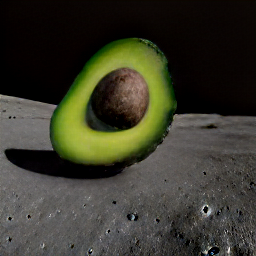

In [10]:
display(im)

In [ ]:
import os
os.kill(os.getpid(), 9)

In [11]:

! pip install diffusers transformers -q

     |████████████████████████████████| 153 kB 34.3 MB/s 
     |████████████████████████████████| 4.7 MB 57.9 MB/s 
     |████████████████████████████████| 120 kB 71.3 MB/s 
     |████████████████████████████████| 6.6 MB 51.2 MB/s 


In [1]:
from torch import autocast
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline


In [2]:
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)


In [3]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [4]:

# load the pipeline
device = "cuda"
model_id_or_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
# or download via git clone https://huggingface.co/CompVis/stable-diffusion-v1-4
# and pass `model_id_or_path="./stable-diffusion-v1-4"` without having to use `use_auth_token=True`.
pipe = pipe.to(device)


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.
{'trained_betas'} was not found in config. Values will be initialized to default values.


In [12]:
pr_file = open("prompt.txt","r+")
prompt = pr_file.read()

In [9]:
init_image = Image.open('image.png').convert("RGB")
init_image = init_image.resize((768, 512))


with autocast("cuda"):
    images = pipe(prompt=prompt+"digital art , 4k , highly detailed , trending on artstation", init_image=init_image, strength=0.75, guidance_scale=7.5).images

images[0].save("image_sd.png")

  0%|          | 0/38 [00:00<?, ?it/s]

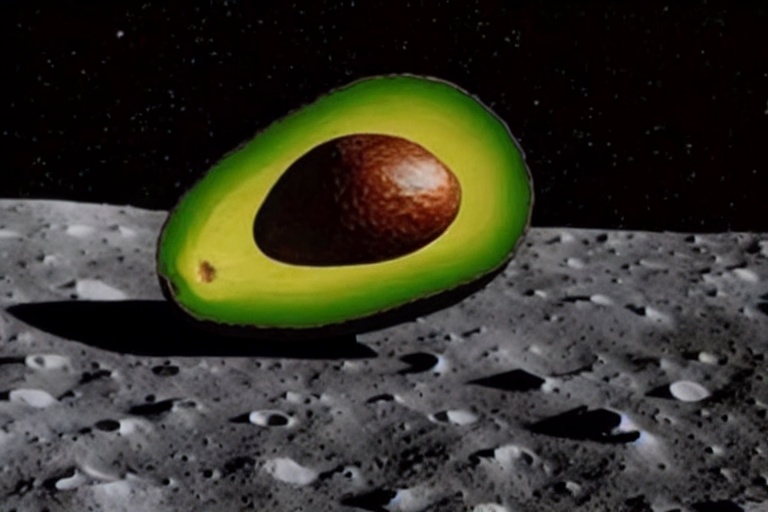

In [8]:
from PIL import Image
im = Image.open('image_sd.png')
display(im)

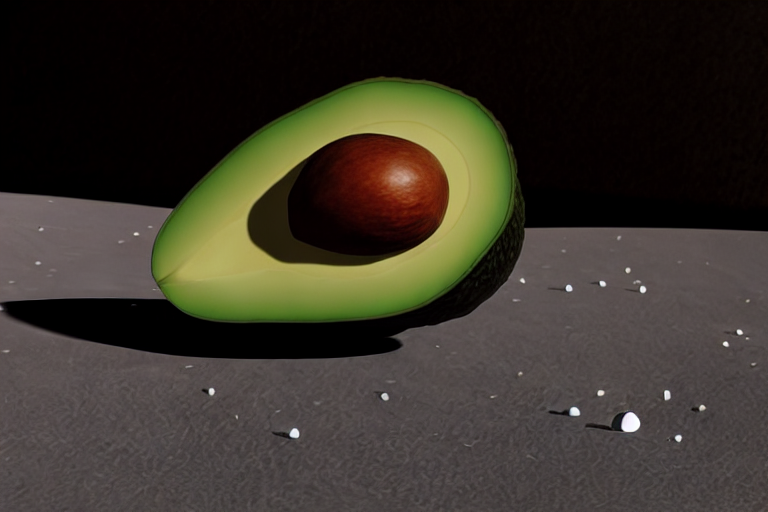

In [10]:
from PIL import Image
im = Image.open('image_sd.png')
display(im)

# Full Code with Gradio if you have Colab Pro (on Free Colab this would be CUDA OOM Error) 

In [2]:
! pip install gradio transformers diffusers min-dalle -q 

     |████████████████████████████████| 6.1 MB 29.7 MB/s 
     |████████████████████████████████| 4.7 MB 56.8 MB/s 
     |████████████████████████████████| 153 kB 69.0 MB/s 
     |████████████████████████████████| 84 kB 2.5 MB/s 
     |████████████████████████████████| 270 kB 66.5 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 2.3 MB 55.9 MB/s 
     |████████████████████████████████| 55 kB 2.5 MB/s 
     |████████████████████████████████| 54 kB 2.6 MB/s 
     |████████████████████████████████| 212 kB 71.0 MB/s 
     |████████████████████████████████| 57 kB 4.7 MB/s 
     |████████████████████████████████| 112 kB 71.5 MB/s 
     |████████████████████████████████| 6.6 MB 56.8 MB/s 
     |████████████████████████████████| 120 kB 75.5 MB/s 
     |████████████████████████████████| 197 kB 74.6 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 80 kB 9.3 MB/s 
     |██████████████████████

In [3]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [19]:
from PIL import Image
import numpy as np
from min_dalle import MinDalle
import gradio as gr 
from torch import autocast
import torch
from diffusers import StableDiffusionImg2ImgPipeline


In [20]:
import torch
torch.set_default_tensor_type(torch.cuda.FloatTensor)


In [6]:
model = MinDalle(
    models_root='./pretrained',
    is_mega=False, 
    is_reusable=True,
    dtype=torch.float16
)


using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [21]:


# load the pipeline
device = "cuda"
model_id_or_path = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_id_or_path,
    revision="fp16", 
    torch_dtype=torch.float16,
    use_auth_token=True
)
# or download via git clone https://huggingface.co/CompVis/stable-diffusion-v1-4
# and pass `model_id_or_path="./stable-diffusion-v1-4"` without having to use `use_auth_token=True`.
pipe = pipe.to(device)


RuntimeError: ignored

In [8]:

def text_to_dalle_to_sd(prompt):

  images = model.generate_image(
      text= prompt,
      seed=-1,
      grid_size=1,
      is_seamless=False,
      temperature=1,
      top_k=256,
      supercondition_factor=16,
      is_verbose=False
  )

  images.save('image.png')

  print("Dalle image saved....")

  init_image = Image.open('image.png').convert("RGB")
  init_image = init_image.resize((768, 512))


  with autocast("cuda"):
      images = pipe(prompt=prompt, init_image=init_image, strength=0.75, guidance_scale=7.5).images

  images[0].save("image_sd.png")

In [16]:
text_to_dalle_to_sd("an avocado spacecraft landed on moon")

RuntimeError: ignored

In [9]:
from pathlib import Path
import os

path1_to_file = 'image.png'
path2_to_file = 'image_sd.png'
path1 = Path(path1_to_file)
path2 = Path(path2_to_file)

if path1.is_file() and path2.is_file():
    print(f'The file {path1_to_file} exists')
else:
    print(f'The file {path1_to_file} does not exist, so creating a placeholder image')
    os.system('wget https://vectorified.com/images/image-placeholder-icon-7.png --output-document=image.png')
    os.system('wget https://vectorified.com/images/image-placeholder-icon-7.png --output-document=image_sd.png')


The file image.png exists


In [10]:
import gc
gc.collect()
torch.cuda.empty_cache()

In [11]:
gr.Interface(
    text_to_dalle_to_sd,
    inputs = [gr.Textbox(label = 'Enter your prompt here....')],
    outputs = [  gr.Image(
                value='image.png',
                label='DALL-E Mini Image',
                elem_id="output_image"
            ), gr.Image(
                value='image_sd.png',
                label='Stable Diffusion Image'
            )],
    css="#output_image{width: 128px}",
).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://15078.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/gradio/routes.py", line 269, in run_predict
    fn_index, raw_input, username, session_state, iterators
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 748, in process_api
    result = await self.call_function(fn_index, inputs, iterator)
  File "/usr/local/lib/python3.7/dist-packages/gradio/blocks.py", line 628, in call_function
    block_fn.fn, *processed_input, limiter=self.limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/to_thread.py", line 32, in run_sync
    func, *args, cancellable=cancellable, limiter=limiter
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 937, in run_sync_in_worker_thread
    return await future
  File "/usr/local/lib/python3.7/dist-packages/anyio/_backends/_asyncio.py", line 867, in run
    result = context.run(func, *args)
  File "<ipython-input-8-cabb338df14e>", line 11, in text_to_dalle_to_sd
    is_verbose=F

Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f8eba6bc1d0>,
 'http://127.0.0.1:7860/',
 'https://15078.gradio.app')